## Lecture 10 dev

In [1]:
## Normal distributions and bokeh

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns
import bokeh as bk

print(bk.__version__)

1.3.4


In [2]:
x_axis = np.arange(100)

mu_values = [25, 30, 50, 60, 70]
sigma_values = [5, 10, 30, 10, 5]


vals = stats.norm.ppf([0.001, 0.5, 0.999])
norm_1 = stats.norm.pdf(x_axis, loc = mu_values[2], scale = sigma_values[2])


#393b79
#5254a3
#6b6ecf
#9c9ede
#637939


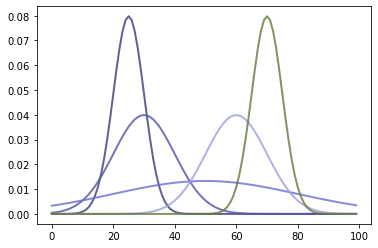

In [108]:
for mu, sigma, color in zip(mu_values, sigma_values, Category20b[5]):
    norm_data = stats.norm.pdf(x_axis, loc = mu, scale = sigma)
    print(color)
    plt.plot(x_axis, norm_data, linewidth=2, color= color, alpha=0.8, label = f'mu={mu}, sigma={sigma}')

plt.savefig('normal.pdf')

In [104]:
from bokeh.palettes import Category20b
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p = figure(plot_width=800, plot_height=500)
p.title.text = 'Click on legend entries to hide the corresponding lines'

for mu, sigma, color in zip(mu_values, sigma_values, Category20b[5]):
    norm_data = stats.norm.pdf(x_axis, loc = mu, scale = sigma)
    print(color)
    p.line(x_axis, norm_data, line_width=2, color= color, alpha=0.8, legend = f'mu={mu}, sigma={sigma}')

p.legend.location = "top_right"
p.legend.click_policy="hide"

#output_file("interactive_legend.html", title="interactive_legend.py example")

show(p)
plt.savefig('normal.pdf')

Loading BokehJS ...

#393b79
#5254a3
#6b6ecf
#9c9ede
#637939


<Figure size 432x288 with 0 Axes>

In [30]:
# load in sunniness data
height_world_data = pd.read_csv('data/NCD_RisC_eLife_2016_height_age18_countries.txt', sep = ",")
height_world_data.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm)
0,Afghanistan,AFG,Men,1896,161.164095,154.484285,167.754033
1,Afghanistan,AFG,Men,1897,161.196286,154.571603,167.659618
2,Afghanistan,AFG,Men,1898,161.228297,154.707340,167.602576
3,Afghanistan,AFG,Men,1899,161.260727,154.835644,167.528113
4,Afghanistan,AFG,Men,1900,161.293068,154.959540,167.508077


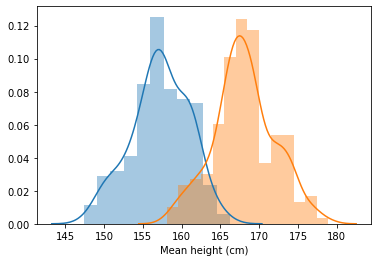

In [99]:
#height_world_data['Mean height (cm)'].hist(bins = 70)
height_world_data_1900 = height_world_data[height_world_data['Year of birth'] == 1939]

height_world_data_women = height_world_data_1900[height_world_data_1900['Sex'] == 'Women']
height_world_data_men = height_world_data_1900[height_world_data_1900['Sex'] == 'Men']
#height_world_data_women['Mean height (cm)'].hist()

sns.distplot(height_world_data_women['Mean height (cm)'])
sns.distplot(height_world_data_men['Mean height (cm)'])

In [48]:
height_usa = height_world_data[height_world_data['Country'] == 'Zimbabwe']
height_usa_men = height_usa[height_usa['Sex'] == 'Women']

In [49]:
height_world_data['Country'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
40395       Zimbabwe
40396       Zimbabwe
40397       Zimbabwe
40398       Zimbabwe
40399       Zimbabwe
Name: Country, Length: 40400, dtype: object>

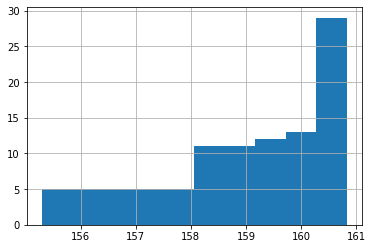

In [50]:
height_usa_men['Mean height (cm)'].hist()

In [51]:
height_usa_men

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm)
40299,Zimbabwe,ZWE,Women,1896,155.301529,150.328372,160.348702
40300,Zimbabwe,ZWE,Women,1897,155.417132,150.565326,160.332171
40301,Zimbabwe,ZWE,Women,1898,155.533202,150.838396,160.284234
40302,Zimbabwe,ZWE,Women,1899,155.649413,151.111059,160.293737
40303,Zimbabwe,ZWE,Women,1900,155.765198,151.367476,160.255881
...,...,...,...,...,...,...,...
40395,Zimbabwe,ZWE,Women,1992,158.583941,157.616103,159.567100
40396,Zimbabwe,ZWE,Women,1993,158.492266,157.484493,159.514718
40397,Zimbabwe,ZWE,Women,1994,158.400025,157.344074,159.477240
40398,Zimbabwe,ZWE,Women,1995,158.307779,157.202394,159.446416


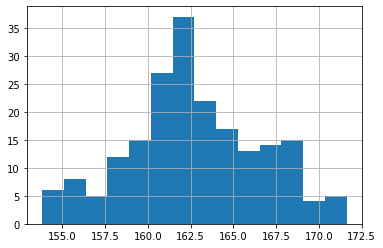

In [64]:
a = height_world_data.groupby('Country').mean()
a['Mean height (cm)'].hist(bins = 14)

In [66]:
achilles_crispr = pd.read_csv('data/Achilles_gene_effect.csv')
achilles_crispr.mean()

A1BG (1)            0.104825
A1CF (29974)        0.064463
A2M (2)            -0.063120
A2ML1 (144568)      0.176577
A3GALT2 (127550)   -0.052651
                      ...   
ZYG11A (440590)     0.073279
ZYG11B (79699)     -0.190963
ZYX (7791)          0.129997
ZZEF1 (23140)      -0.175642
ZZZ3 (26009)       -0.382715
Length: 18333, dtype: float64

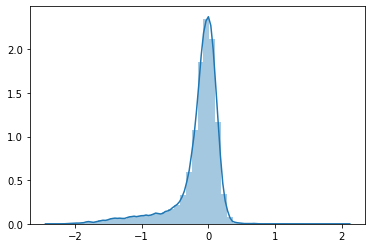

In [109]:
sns.distplot(achilles_crispr.mean())

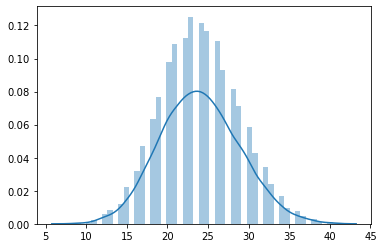

In [81]:
import matplotlib.pyplot as plt
from networkx import nx

n = 10000
m = 120000


G = nx.gnm_random_graph(n, m)
deg_vec = [G.degree[i] for i in range(n)]

sns.distplot(deg_vec)


In [73]:
deg_vec = [G.degree[i] for i in range(n)]

In [74]:
deg_vec

[24,
 24,
 23,
 18,
 17,
 21,
 31,
 17,
 25,
 18,
 21,
 20,
 28,
 21,
 31,
 25,
 22,
 23,
 25,
 25,
 22,
 17,
 27,
 21,
 24,
 20,
 26,
 26,
 32,
 19,
 29,
 24,
 20,
 24,
 27,
 31,
 22,
 22,
 25,
 28,
 34,
 25,
 29,
 24,
 22,
 27,
 26,
 25,
 26,
 32,
 19,
 13,
 23,
 21,
 28,
 24,
 31,
 24,
 22,
 25,
 18,
 24,
 23,
 31,
 26,
 39,
 24,
 21,
 22,
 21,
 21,
 16,
 27,
 34,
 28,
 25,
 18,
 19,
 30,
 23,
 25,
 20,
 27,
 23,
 30,
 21,
 27,
 20,
 26,
 25,
 10,
 21,
 22,
 25,
 26,
 26,
 21,
 25,
 24,
 21]

In [4]:
## p-hacking
# %Part 1
# h = [];
# p = [];
# for n=1:10000
#     x = randn(1,50)+30;
#     y = randn(1,50)+30;
#     [h(n),p(n)]=ttest2(x,y);
# end
# ['t-test: fraction of p-values < 0.05 = ' num2str(sum(p<0.05)/size(p,2))]
# ['t-test: fraction of p-values < 0.001 = ' num2str(sum(p<0.001)/size(p,2))]

# %Part 2

# r = [];
# p1 = [];
# for n=1:10000
#     x = rand(1,50); 
#     y = rand(1,50);
#     [r(n),p1(n)]=corr(x',y');
# end
# ['Correlation: fraction of p-values < 0.05 = ' num2str(sum(p1<0.05)/size(p1,2))]
# ['Correlation: fraction of p-values < 0.001 = ' num2str(sum(p1<0.001)/size(p1,2))]
np.random.random((1,50))

array([[0.78166295, 0.99290989, 0.01456345, 0.09316254, 0.58392369,
        0.86294883, 0.12998716, 0.70074057, 0.23801117, 0.02487038,
        0.59210619, 0.93560607, 0.92496935, 0.10973291, 0.54785982,
        0.82787444, 0.72101888, 0.85254405, 0.8101658 , 0.56432565,
        0.38933069, 0.40280729, 0.05259941, 0.43083518, 0.34891153,
        0.63115472, 0.14179977, 0.04892124, 0.51860631, 0.26244487,
        0.69804093, 0.76613145, 0.48881106, 0.50061439, 0.59815836,
        0.48591475, 0.45310191, 0.69117336, 0.19520111, 0.17608022,
        0.83467833, 0.95382677, 0.71759532, 0.88902154, 0.01524513,
        0.60133056, 0.90373444, 0.67994685, 0.96403081, 0.93416437]])

In [18]:
for n in np.arange(10):
    x = np.random.random((50)) + 30
    y = np.random.random((50)) + 30
    print(stats.ttest_ind(x,y))

x

Ttest_indResult(statistic=0.6114064872998188, pvalue=0.5423462020443732)
Ttest_indResult(statistic=0.22127458529712965, pvalue=0.8253390341876564)
Ttest_indResult(statistic=-1.5961705582765207, pvalue=0.11367054213885047)
Ttest_indResult(statistic=-0.6502594250716036, pvalue=0.5170461747576099)
Ttest_indResult(statistic=0.5654849342982282, pvalue=0.5730363798206817)
Ttest_indResult(statistic=-0.47560130038991855, pvalue=0.6354168785115575)
Ttest_indResult(statistic=0.9517824960148177, pvalue=0.34354885667577284)
Ttest_indResult(statistic=1.3584827273781228, pvalue=0.1774294615298633)
Ttest_indResult(statistic=-0.6041102732171512, pvalue=0.5471662936405345)
Ttest_indResult(statistic=0.14947724253527844, pvalue=0.8814842533615195)


array([30.22997739, 30.00266299, 30.92487431, 30.62557139, 30.12210857,
       30.33804076, 30.15485538, 30.96720582, 30.6097807 , 30.78592664,
       30.42620971, 30.58414878, 30.56268682, 30.12246186, 30.5161942 ,
       30.65999141, 30.4852633 , 30.44568096, 30.77091895, 30.16421324,
       30.56236057, 30.06846994, 30.90141777, 30.80369371, 30.05675894,
       30.84044247, 30.92057961, 30.43542606, 30.98671654, 30.79546842,
       30.0201267 , 30.66141904, 30.85046069, 30.22471863, 30.66909012,
       30.68960013, 30.69183006, 30.94535271, 30.79483618, 30.152289  ,
       30.10290411, 30.58512279, 30.86692249, 30.24716772, 30.39454447,
       30.68075928, 30.75630766, 30.69931157, 30.18802716, 30.82182418])